In [1]:
#Se importan las librerias necesaras

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.api import add_constant
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pystan

pd.set_option('display.max_columns', None) # para ver todas las columnas

In [2]:
stars = pd.read_csv("stellar.csv")

In [3]:
col = 'clase'
print(stars[col].unique())

['MS' 'PMS']


In [4]:
stars = stars[stars.clase != 'PMS']

In [5]:
cols = ['M','eM1','eM2','R','eR1','eR2','Teff','eTeff1', 'eTeff2','L','eL1','eL2','Meta','eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho', 'erho1', 'erho2','clase']

In [6]:
stars = stars[cols]

In [7]:
stars.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN,MS
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN,MS
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN,MS
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN,MS
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN,MS
5,2.148,0.070,0.070,2.074,0.022,0.022,9800,230,230,35.645,3.801,3.801,NaN,NaN,NaN,4.137,0.023,0.023,NaN,NaN,NaN,MS
6,1.974,0.040,0.040,2.764,0.020,0.020,7100,60,60,17.418,0.654,0.654,NaN,NaN,NaN,3.850,0.004,0.004,NaN,NaN,NaN,MS
7,2.140,0.040,0.040,3.912,0.030,0.030,6700,60,60,27.669,1.105,1.105,NaN,NaN,NaN,3.580,0.004,0.004,NaN,NaN,NaN,MS
9,1.190,0.006,0.006,1.762,0.007,0.007,6310,147,147,4.365,0.421,0.421,-0.14,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN,MS
10,1.105,0.007,0.007,1.224,0.003,0.003,5824,26,26,1.549,0.029,0.029,0.24,0.04,0.04,4.306,0.004,0.004,NaN,NaN,NaN,MS


In [8]:
nulls = stars.isnull().sum(axis = 0)

In [9]:
nulls

M           0
eM1         0
eM2         0
R           0
eR1         0
eR2         0
Teff        0
eTeff1      0
eTeff2      0
L           7
eL1         7
eL2         7
Meta      197
eMeta1    197
eMeta2    197
logg       68
elogg1     68
elogg2     68
rho       274
erho1     274
erho2     274
clase       0
dtype: int64

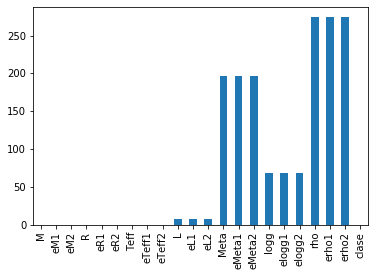

In [10]:
nulls.plot(kind='bar')

In [11]:
print('El porcentaje de NaNs en L es:', round(17*100/726,2), '%')
print('El porcentaje de NaNs en Meta es:', round(216*100/726,2), '%')
print('El porcentaje de NaNs en logg es:', round(94*100/726,2), '%')
print('El porcentaje de NaNs en rho es:', round(304*100/726,2), '%')

El porcentaje de NaNs en L es: 2.34 %
El porcentaje de NaNs en Meta es: 29.75 %
El porcentaje de NaNs en logg es: 12.95 %
El porcentaje de NaNs en rho es: 41.87 %


In [12]:
stars_mean_DS2 = stars.fillna(stars.mean())

In [13]:
stars_mean_DS2.head(10)

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.710000,0.100000,0.100000,4.143000,0.003000,0.003000,0.333666,0.012634,0.012152,MS
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.710000,0.100000,0.100000,4.242000,0.003000,0.003000,0.333666,0.012634,0.012152,MS
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.100000,0.150000,0.150000,4.173000,0.008000,0.008000,0.333666,0.012634,0.012152,MS
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.100000,0.150000,0.150000,4.351000,0.007000,0.007000,0.333666,0.012634,0.012152,MS
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,-0.049187,0.103461,0.100625,4.075000,0.023000,0.023000,0.333666,0.012634,0.012152,MS
5,2.148,0.070,0.070,2.074,0.022,0.022,9800,230,230,35.645,3.801,3.801,-0.049187,0.103461,0.100625,4.137000,0.023000,0.023000,0.333666,0.012634,0.012152,MS
6,1.974,0.040,0.040,2.764,0.020,0.020,7100,60,60,17.418,0.654,0.654,-0.049187,0.103461,0.100625,3.850000,0.004000,0.004000,0.333666,0.012634,0.012152,MS
7,2.140,0.040,0.040,3.912,0.030,0.030,6700,60,60,27.669,1.105,1.105,-0.049187,0.103461,0.100625,3.580000,0.004000,0.004000,0.333666,0.012634,0.012152,MS
9,1.190,0.006,0.006,1.762,0.007,0.007,6310,147,147,4.365,0.421,0.421,-0.140000,0.100000,0.100000,4.116943,0.015766,0.015952,0.333666,0.012634,0.012152,MS
10,1.105,0.007,0.007,1.224,0.003,0.003,5824,26,26,1.549,0.029,0.029,0.240000,0.040000,0.040000,4.306000,0.004000,0.004000,0.333666,0.012634,0.012152,MS


## Tratamiento del set de datos DS2

Debido a como se ha observado anteriormente en la tabla de datos, cada variable cuenta con dos errores asociados a su observación. A continuación, se pretende crear una única variable de error por feature, promediando su valor por cada fila.

In [14]:
#error M eM_avg
column_list = ['eM1','eM2']
stars_mean_DS2["eM_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error R eR_avg
column_list = ['eR1','eR2']
stars_mean_DS2["eR_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error Teff eTeff_avg
column_list = ['eTeff1','eTeff2']
stars_mean_DS2["eTeff_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error L el_avg
column_list = ['eL1','eL2']
stars_mean_DS2["eL_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error Meta eMeta_avg
column_list = ['eMeta1','eMeta2']
stars_mean_DS2["eMeta_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error logg elogg_avg
column_list = ['elogg1','elogg2']
stars_mean_DS2["elogg_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#error rho eR_avg
column_list = ['erho1','erho2']
stars_mean_DS2["erho_avg"] = stars_mean_DS2[column_list].sum(axis=1)

#Promediado del error
stars_mean_DS2[('eM_avg')] = stars_mean_DS2['eM_avg'] / 2
stars_mean_DS2['eR_avg'] = stars_mean_DS2['eR_avg'] / 2
stars_mean_DS2['eTeff_avg'] = stars_mean_DS2['eTeff_avg'] / 2
stars_mean_DS2['eL_avg'] = stars_mean_DS2['eL_avg'] / 2
stars_mean_DS2['eMeta_avg'] = stars_mean_DS2['eMeta_avg'] / 2
stars_mean_DS2['elogg_avg'] = stars_mean_DS2['elogg_avg'] / 2
stars_mean_DS2['erho_avg'] = stars_mean_DS2['erho_avg'] / 2

#Se muestra la nueva tabla con los errores promediados por fila
stars_mean_DS2.head()

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,clase,eM_avg,eR_avg,eTeff_avg,eL_avg,eMeta_avg,elogg_avg,erho_avg
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.710000,0.100000,0.100000,4.143,0.003,0.003,0.333666,0.012634,0.012152,MS,0.005,0.005,150.0,0.217,0.100000,0.003,0.012393
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.710000,0.100000,0.100000,4.242,0.003,0.003,0.333666,0.012634,0.012152,MS,0.006,0.006,150.0,0.171,0.100000,0.003,0.012393
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.100000,0.150000,0.150000,4.173,0.008,0.008,0.333666,0.012634,0.012152,MS,0.009,0.014,120.0,0.356,0.150000,0.008,0.012393
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.100000,0.150000,0.150000,4.351,0.007,0.007,0.333666,0.012634,0.012152,MS,0.006,0.010,120.0,0.164,0.150000,0.007,0.012393
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,-0.049187,0.103461,0.100625,4.075,0.023,0.023,0.333666,0.012634,0.012152,MS,0.070,0.023,250.0,5.497,0.102043,0.023,0.012393


### Set de datos DS2 como base

In [15]:
df_DS2 = stars_mean_DS2.drop(['eM1', 'eM2', 'eR1', 'eR2', 'eTeff1', 'eTeff2', 'eL1','eL2', 'eMeta1', 'eMeta2', 'elogg1', 'elogg2', 'erho1', 
                                'erho2', 'eM_avg', 'eR_avg', 'eTeff_avg', 'eL_avg','eMeta_avg', 'elogg_avg', 'erho_avg'], axis='columns')

df_DS2.head()

,M,R,Teff,L,Meta,logg,rho,clase
0,0.876,1.316,5945,1.941,-0.710000,4.143,0.333666,MS
1,0.859,1.163,5959,1.531,-0.710000,4.242,0.333666,MS
2,1.414,1.614,6575,4.375,0.100000,4.173,0.333666,MS
3,1.209,1.218,6145,1.901,0.100000,4.351,0.333666,MS
4,2.164,2.232,10300,50.350,-0.049187,4.075,0.333666,MS


<Figure size 800x640 with 0 Axes>

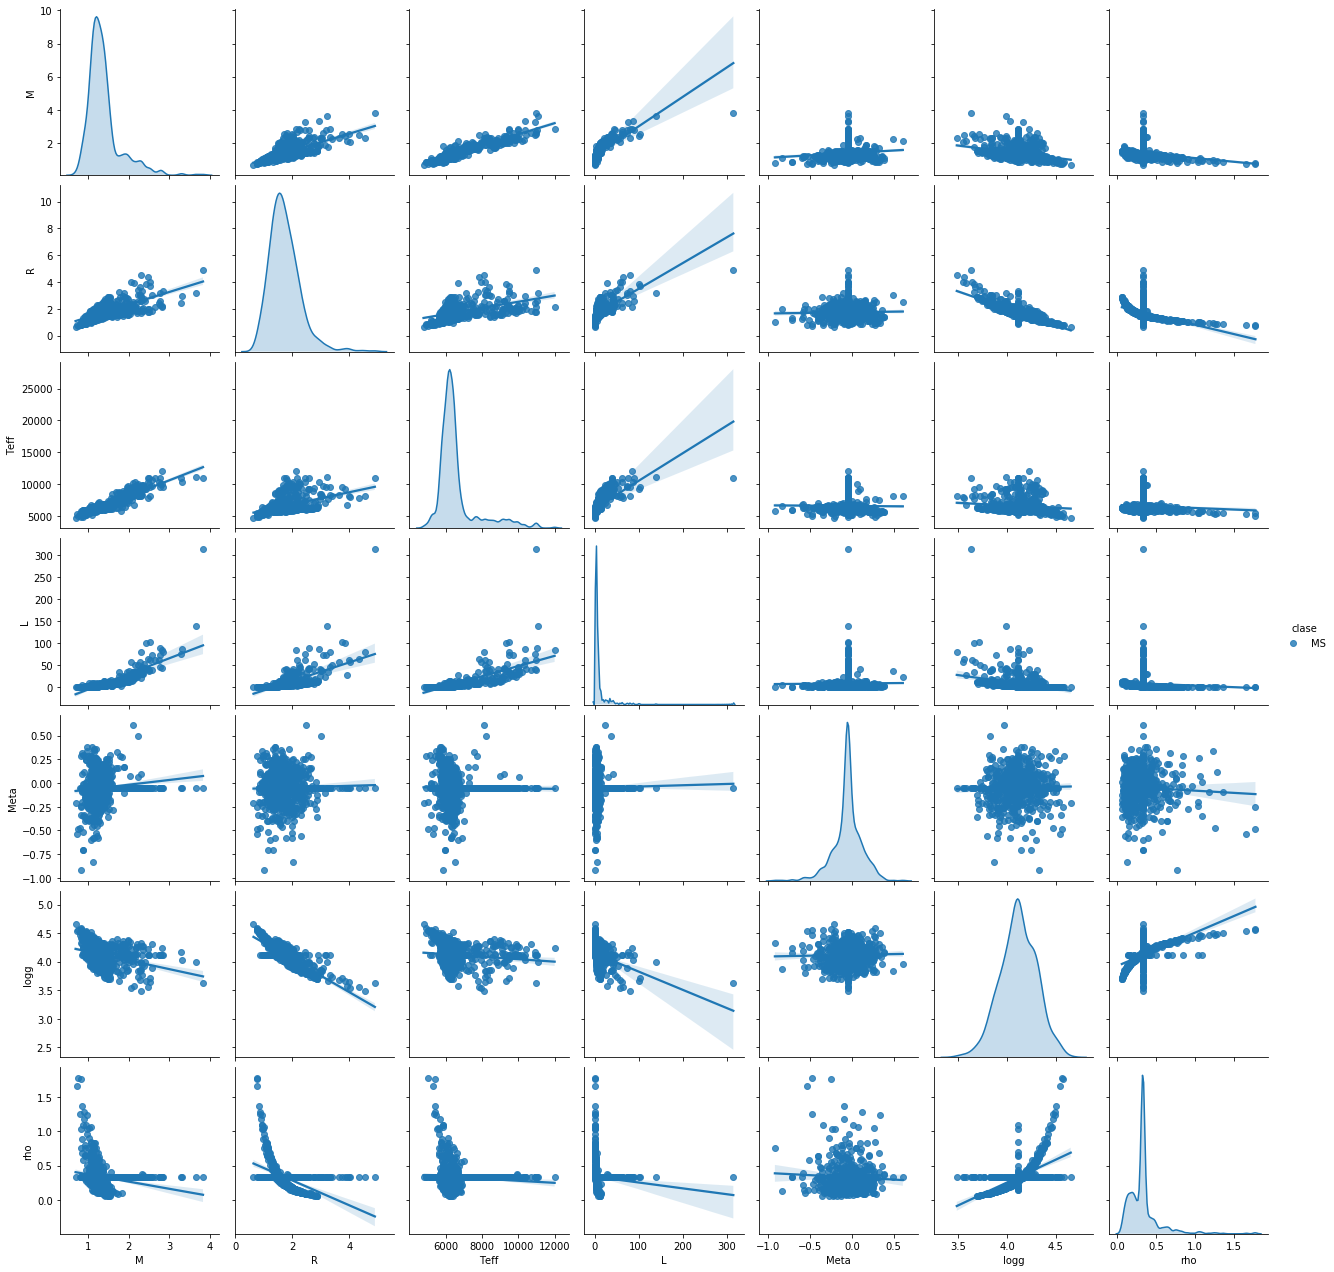

In [16]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_DS2, kind="reg", hue="clase")
#sns.pairplot(df_DS1, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [17]:
#Procesamiento de los datos para su utilizacion
data_frame = dict(stars_mean_DS2)

In [18]:
#Se preparan los datos para el modelo de Stan
data = {}
data['obs_L'] = np.array(data_frame['L'])
data['err_L'] = np.array(data_frame['eL_avg'])

data['obs_Teff'] = np.array(data_frame['Teff'])
data['err_Teff'] = np.array(data_frame['eTeff_avg'])

data['obs_Meta'] = np.array(data_frame['Meta'])
data['err_Meta'] = np.array(data_frame['eMeta_avg'])

data['obs_logg'] = np.array(data_frame['logg'])
data['err_logg'] = np.array(data_frame['elogg_avg'])

data['obs_rho'] = np.array(data_frame['rho'])
data['err_rho'] = np.array(data_frame['erho_avg'])

data['obs_R'] = np.array(data_frame['R']) 
data['err_R'] = np.array(data_frame['eR_avg']) 
data['N'] = len(data['obs_L'])

In [20]:
# Stan Gaussian model 
stan_code=""" 
data{ 
    int<lower=0> N;             # numero de puntos
    vector[N] obs_Teff;         # obs de Teff    
    vector[N] obs_L;            # obs de L
    vector[N] obs_Meta;         # obs de Meta
    vector[N] obs_logg;         # obs de logg
    vector[N] obs_rho;          # obs de rho
    vector<lower=0>[N] err_Teff;   # error en la medicion de Teff    
    vector<lower=0>[N] err_L;   # error en la medicion de L
    vector<lower=0>[N] err_Meta;   # error en la medicion de Meta
    vector<lower=0>[N] err_logg;   # error en la medicion de logg
    vector<lower=0>[N] err_rho;    # error en la medicion de rho
    vector[N] obs_R;            # obs del Radio 
    vector<lower=0>[N] err_R;   # error en la medicion de R 
} 
parameters{ 
    real alpha;                 # intercepcion
    real beta1;                 # coeficiente de L
    real beta2;                 # coeficiente de Teff
    real beta3;                 # coeficiente de Meta
    real beta4;                 # coeficiente de logg
    real beta5;                 # coeficiente de rho
    real<lower=0> epsilon;      # scatter around true black hole mass 
    vector[N] x1;               # Verdaderos valores de L
    vector[N] x2;               # Verdaderos valores de Teff
    vector[N] x3;               # Verdaderos valores de Meta
    vector[N] x4;               # Verdaderos valores de logg
    vector[N] x5;               # Verdaderos valores de rho
    vector[N] y;                # Verdaderos valores de R 
} 
  model{ 
    # likelihood and priors 
    alpha ~ normal(0, 1000); 
    beta1 ~ normal(0, 1000);
    beta2 ~ normal(0, 1000); 
    beta3 ~ normal(0, 1000); 
    beta4 ~ normal(0, 1000); 
    beta5 ~ normal(0, 1000); 
    epsilon ~ gamma(0.001, 0.001); 
       for (i in 1:N){ 
        x1[i] ~ normal(0, 1000);
        x2[i] ~ normal(0, 1000);
        x3[i] ~ normal(0, 1000);
        x4[i] ~ normal(0, 1000);
        x5[i] ~ normal(0, 1000);
        y[i] ~ normal(0, 1000); 
    } 
      obs_Teff ~ normal(x1, err_Teff); 
      obs_L ~ normal(x2, err_L);
      obs_Meta ~ normal(x3, err_Meta);
      obs_logg ~ normal(x4, err_logg);
      obs_rho ~ normal(x5, err_rho);
    y ~ normal(alpha + beta1 * x1 + beta2 * x2 + beta3 * x3 + beta4 * x4 + beta5 * x5, epsilon); 
    obs_R ~ normal(y, err_R); 
} 
"""

In [21]:
# Run mcmc 
fit = pystan.stan(model_code=stan_code, data=data, iter=15000, chains=3, 
                warmup=5000, thin=10, n_jobs=3) 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6577cdba2e65bc5a99a127aee35ca9f4 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [22]:
def save(obj, filename):
    """Save compiled models for reuse."""
    import pickle
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

def load(filename):
    """Reload compiled models for reuse."""
    import pickle
    return pickle.load(open(filename, 'rb'))

In [23]:
save(fit, 'model_fillwavg-Radio.pic')

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  """


### Analis de los resultados

In [24]:
import arviz as az

In [25]:
nlines = 12

output = str(fit).split('\n') 
for item in output[:nlines]: 
    print(item)

Inference for Stan model: anon_model_6577cdba2e65bc5a99a127aee35ca9f4.
3 chains, each with iter=15000; warmup=5000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha     9.27  8.9e-3   0.18   8.93   9.15   9.27   9.39   9.63    403   1.01
beta1   1.5e-5  1.2e-6 6.4e-6 2.4e-6 1.0e-5 1.5e-5 1.9e-5 2.7e-5     29   1.11
beta2     0.02  6.4e-5 8.4e-4   0.02   0.02   0.02   0.02   0.02    170   1.03
beta3      0.1  1.4e-3   0.03   0.04   0.07    0.1   0.12   0.16    530    1.0
beta4    -1.88  2.3e-3   0.04  -1.97  -1.91  -1.88  -1.85   -1.8    380   1.01
beta5    -0.13  1.6e-3   0.04   -0.2  -0.15  -0.13   -0.1  -0.05    503   1.01
epsilon   0.14  1.5e-4 4.5e-3   0.13   0.13   0.14   0.14   0.15    880    1.0


Se va a convertir el fit en un diccionario para ser mas facil tratado

In [26]:
fit_df = fit.to_dataframe()

In [27]:
az_data = az.from_pystan(
                posterior=fit,
                posterior_predictive='y',
                observed_data=['obs_R'],
             )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AAE07A8348>],
      dtype=object)

C:\Users\vernyjmo\Miniconda3\envs\py3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


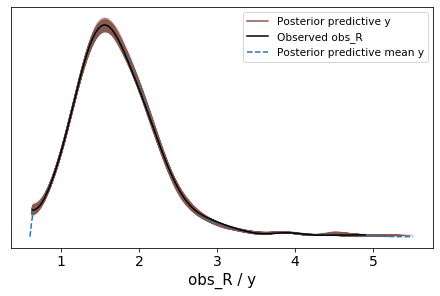

In [28]:
az.plot_ppc(az_data, data_pairs = {'obs_R' : 'y'})

In [29]:
la = fit.extract(permuted=True)

In [30]:
from sklearn import preprocessing, metrics, linear_model
bay_test_mse = metrics.mean_squared_error(stars_mean_DS2.R, la['y'].mean(0))
print('Bayes Test MSE:', bay_test_mse)

Bayes Test MSE: 0.0014118973505231592


In [31]:
from sklearn.metrics import r2_score
r2_Score_Bayes = r2_score(stars_mean_DS2.R, la['y'].mean(0))
print(r2_Score_Bayes)

0.9952860333728486


In [32]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(stars_mean_DS2.R, la['y'].mean(0))
print(MAE)

0.010638388276141286
